# HoloViews 可视化

[HoloViews](https://holoviews.org/) 是一个流行且功能强大的数据可视化库，支持多种数据和绘图后端。

[hvPlot](https://hvplot.holoviz.org/index.html)（快速可视化）和 [GeoViews](https://holoviz.org/assets/geoviews.png)（空间可视化）都是基于 HoloViews 构建的，并产生 `HoloViews` 对象。

**Panel、HoloViews、hvPlot 和 GeoViews 都是 [HoloViz](https://holoviz.org) 生态系统的成员，它们可以完美地协同工作**。

`PnHoloViews` 组件使用 HoloViews 支持的绘图后端之一渲染 [HoloViews](https://holoviews.org/) 对象。这包括 [hvPlot](https://hvplot.holoviz.org/index.html) 和 [GeoViews](https://holoviz.org/assets/geoviews.png) 生成的对象。

`PnHoloViews` 组件支持显示包含小部件的交互式 [`HoloMap`](https://holoviews.org/reference/containers/bokeh/HoloMap.html) 和 [`DynamicMap`](https://holoviews.org/reference/containers/bokeh/DynamicMap.html) 对象。`PnHoloViews` 组件甚至允许自定义小部件类型及其相对于图表的位置。

底层实现为`panel.pane.HoloViews`，参数基本一致，参考文档：https://panel.holoviz.org/reference/panes/HoloViews.html


In [1]:
##ignore
%load_ext vuepy
from panel_vuepy import vpanel


## 基本用法

`PnHoloViews` 组件将任何 `HoloViews` 对象自动转换为可显示的面板，同时保持其所有交互功能：


In [2]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
  <PnHoloViews :object="box" :height="300" :width="500" />
</template>
<script lang='py'>
import numpy as np
import holoviews as hv

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
box = hv.Scatter(data, kdims="group", vdims="value").sort().opts()
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n  <PnHoloViews :object=\"box\" :height=\"300\" :width=\"500\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport holoviews as hv\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\nbox = hv.Scatter(data, kdims=\"group\", vdims=\"value\").sort().opts()\n</script>\n", "setup": ""}


Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] HoloViews(Scatter, height=300, sizing_mode='fixed', width=500)


通过设置组件的 `object` 可以像所有其他组件对象一样更新图表：


In [3]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnHoloViews :object="plot" :height="300" :width="500" ref='hv_pane' />
  <PnButton @click="update_plot()">更新为小提琴图</PnButton>
</template>
<script lang='py'>
import numpy as np
import holoviews as hv
from vuepy import ref

hv_pane = ref(None)

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
box = hv.Scatter(data, kdims="group", vdims="value").sort().opts()
plot = box

def update_plot():
    nonlocal plot
    plot = hv.Violin(box).opts(violin_color='Group', responsive=True, height=300)
    hv_pane.value.unwrap().object = plot
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnHoloViews :object=\"plot\" :height=\"300\" :width=\"500\" ref='hv_pane' />\n  <PnButton @click=\"update_plot()\">\u66f4\u65b0\u4e3a\u5c0f\u63d0\u7434\u56fe</PnButton>\n</template>\n<script lang='py'>\nimport numpy as np\nimport holoviews as hv\nfrom vuepy import ref\n\nhv_pane = ref(None)\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\nbox = hv.Scatter(data, kdims=\"group\", vdims=\"value\").sort().opts()\nplot = box\n\ndef update_plot():\n    nonlocal plot\n    plot = hv.Violin(box).opts(violin_color='Group', responsive=True, height=300)\n    hv_pane.value.unwrap().object = plot\n</script>\n", "setup": ""}



您也可以显示 [hvPlot](https://hvplot.holoviz.org/)（和 [GeoViews](https://geoviews.org/)）对象，因为它们是 `HoloViews` 对象：


In [4]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnHoloViews :object="plot" :height="300" :width="500" />
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.box(by="group", y="value", responsive=True, height=300)
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnHoloViews :object=\"plot\" :height=\"300\" :width=\"500\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nplot = df.hvplot.box(by=\"group\", y=\"value\", responsive=True, height=300)\n</script>\n", "setup": ""}



您还可以显示 [`HoloMap`](https://holoviews.org/reference/containers/bokeh/HoloMap.html) 和 [`DynamicMap`](https://holoviews.org/reference/containers/bokeh/DynamicMap.html) 对象。

[HoloViews](https://holoviews.org/)（框架）如果 [`HoloMap`](https://holoviews.org/reference/containers/bokeh/HoloMap.html) 或 [DynamicMap](https://holoviews.org/reference/containers/bokeh/DynamicMap.html) 声明了任何键维度，它原生渲染带有小部件的图表。这种方法高效地仅更新图表内的数据，而不是完全替换图表。


In [5]:
##ignore
import holoviews as hv
import panel as pn
import numpy as np
import pandas as pd
import hvplot.pandas
import holoviews.plotting.bokeh

def sine(frequency=1.0, amplitude=1.0, function='sin'):
    xs = np.arange(200)/200*20.0
    ys = amplitude*getattr(np, function)(frequency*xs)
    return pd.DataFrame(dict(y=ys), index=xs).hvplot(height=250, responsive=True)

dmap = hv.DynamicMap(sine, kdims=['frequency', 'amplitude', 'function']).redim.range(
    frequency=(0.1, 10), amplitude=(1, 10)).redim.values(function=['sin', 'cos', 'tan'])

hv_panel = pn.pane.HoloViews(dmap)
hv_panel

HoloViews(DynamicMap, height=250, sizing_mode='stretch_width')

In [6]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
  <PnHoloViews :object="dmap" :width='300' :height='300'/>
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas
import holoviews as hv
import holoviews.plotting.bokeh

def sine(frequency=1.0, amplitude=1.0, function='sin'):
    xs = np.arange(200)/200*20.0
    ys = amplitude*getattr(np, function)(frequency*xs)
    return pd.DataFrame(dict(y=ys), index=xs).hvplot(height=250, responsive=True)

# todo have no controls
dmap = hv.DynamicMap(sine, kdims=['frequency', 'amplitude', 'function']).redim.range(
    frequency=(0.1, 10), amplitude=(1, 10)).redim.values(function=['sin', 'cos', 'tan'])
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n  <PnHoloViews :object=\"dmap\" :width='300' :height='300'/>\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\nimport holoviews as hv\nimport holoviews.plotting.bokeh\n\ndef sine(frequency=1.0, amplitude=1.0, function='sin'):\n    xs = np.arange(200)/200*20.0\n    ys = amplitude*getattr(np, function)(frequency*xs)\n    return pd.DataFrame(dict(y=ys), index=xs).hvplot(height=250, responsive=True)\n\n# todo have no controls\ndmap = hv.DynamicMap(sine, kdims=['frequency', 'amplitude', 'function']).redim.range(\n    frequency=(0.1, 10), amplitude=(1, 10)).redim.values(function=['sin', 'cos', 'tan'])\n</script>\n", "setup": ""}


Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] HoloViews(DynamicMap, height=300, sizing_mode='stretch_width', width=300)


## 后端选择

`PnHoloViews` 组件默认使用 'bokeh' 绘图后端（如果没有通过 `holoviews` 加载后端），但您可以根据需要将后端更改为 'bokeh'、'matplotlib' 和 'plotly' 中的任何一个。

### Bokeh

Bokeh 是默认的绘图后端，所以通常您不必指定它。但让我们在这里展示它是如何工作的：


In [7]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnHoloViews :object="plot" backend='bokeh' sizing_mode='stretch_width' :height="300" />
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value")
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnHoloViews :object=\"plot\" backend='bokeh' sizing_mode='stretch_width' :height=\"300\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nplot = df.hvplot.scatter(x=\"group\", y=\"value\")\n</script>\n", "setup": ""}



### Matplotlib

Matplotlib 后端允许生成用于打印和出版的图形。如果你想允许响应式大小调整，你可以设置 `format='svg'`，然后使用标准的响应式 `sizing_mode` 设置：


In [8]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnHoloViews :object="plot" backend='matplotlib' format='svg'
               sizing_mode='stretch_both' :center="False" />
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas
hvplot.extension("matplotlib")

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value")
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnHoloViews :object=\"plot\" backend='matplotlib' format='svg'\n               sizing_mode='stretch_both' :center=\"False\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\nhvplot.extension(\"matplotlib\")\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nplot = df.hvplot.scatter(x=\"group\", y=\"value\")\n</script>\n", "setup": ""}



### Plotly

要使用 'plotly' 绘图后端，您需要运行 `hv.extension("plotly")` 来配置 'plotly' 后端。

如果您使用的是 `hvPlot`，您可以使用 `hvplot.extension("plotly")` 来代替：


In [9]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnHoloViews :object="plot" backend='plotly' :height="300" />
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas
hvplot.extension("plotly")

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value", height=300, responsive=True)
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnHoloViews :object=\"plot\" backend='plotly' :height=\"300\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\nhvplot.extension(\"plotly\")\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nplot = df.hvplot.scatter(x=\"group\", y=\"value\", height=300, responsive=True)\n</script>\n", "setup": ""}



### 动态后端切换

您还可以通过小部件动态更改绘图后端：


In [10]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnColumn>
    <PnRadioButtonGroup v-model="backend.value" 
                        :options="['bokeh', 'matplotlib', 'plotly']" 
                        button_type="primary" button_style="outline" />
    <PnHoloViews :object="plot" :backend="backend.value" 
                 sizing_mode="stretch_width" :height="300" />
  </PnColumn>
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas
from vuepy import ref
import holoviews as hv
hv.extension("bokeh", "matplotlib", "plotly")

data = {
    "group": np.random.randint(0, 10, 100),
    "value": np.random.randn(100),
}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value", height=300, 
                         responsive=True, 
                         title="Try changing the backend")
backend = ref('bokeh')
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnColumn>\n    <PnRadioButtonGroup v-model=\"backend.value\" \n                        :options=\"['bokeh', 'matplotlib', 'plotly']\" \n                        button_type=\"primary\" button_style=\"outline\" />\n    <PnHoloViews :object=\"plot\" :backend=\"backend.value\" \n                 sizing_mode=\"stretch_width\" :height=\"300\" />\n  </PnColumn>\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\nfrom vuepy import ref\nimport holoviews as hv\nhv.extension(\"bokeh\", \"matplotlib\", \"plotly\")\n\ndata = {\n    \"group\": np.random.randint(0, 10, 100),\n    \"value\": np.random.randn(100),\n}\ndf = pd.DataFrame(data)\nplot = df.hvplot.scatter(x=\"group\", y=\"value\", height=300, \n                         responsive=True, \n                         title=\"Try changing the backend\")\nbackend = ref('bokeh')\n</script>\n", "setup": ""}



## 链接坐标轴

默认情况下，具有共享键或值维度的图表的坐标轴是链接的。您可以通过将 `linked_axes` 参数设置为 `False` 来删除链接：


In [11]:
%%vuepy_run --plugins vpanel --show-code
<template>
  <PnColumn>
    <PnHoloViews :object="not_linked_plot" backend='bokeh' 
                 sizing_mode='stretch_width' :height="200" :linked_axes="False" />
    <PnHoloViews :object="linked_plot" backend='bokeh' 
                 sizing_mode='stretch_width' :height="200" />
    <PnHoloViews :object="linked_plot" backend='bokeh' 
                 sizing_mode='stretch_width' :height="200" />
  </PnColumn>
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas
import holoviews as hv
hv.extension("bokeh")

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
not_linked_plot = df.hvplot.scatter(x="group", y="value", responsive=True, title="Not Linked Axes")\
    .opts(active_tools=['box_zoom'])
linked_plot = df.hvplot.scatter(x="group", y="value", responsive=True, title="Linked Axes")\
    .opts(active_tools=['box_zoom'])
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n  <PnColumn>\n    <PnHoloViews :object=\"not_linked_plot\" backend='bokeh' \n                 sizing_mode='stretch_width' :height=\"200\" :linked_axes=\"False\" />\n    <PnHoloViews :object=\"linked_plot\" backend='bokeh' \n                 sizing_mode='stretch_width' :height=\"200\" />\n    <PnHoloViews :object=\"linked_plot\" backend='bokeh' \n                 sizing_mode='stretch_width' :height=\"200\" />\n  </PnColumn>\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\nimport holoviews as hv\nhv.extension(\"bokeh\")\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nnot_linked_plot = df.hvplot.scatter(x=\"group\", y=\"value\", responsive=True, title=\"Not Linked Axes\")\\\n    .opts(active_tools=['box_zoom'])\nlinked_plot = df.hvplot.scatter(x=\"group\", y=\"value\", responsive=True, title=\"Linked Axes\")\\\n    .opt


## 主题

您可以更改 `theme`：


In [12]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
  <PnHoloViews :object="plot" :height="300" theme="night_sky" />
</template>
<script lang='py'>
import numpy as np
import pandas as pd
import hvplot.pandas

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value", height=300, responsive=True)
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n  <PnHoloViews :object=\"plot\" :height=\"300\" theme=\"night_sky\" />\n</template>\n<script lang='py'>\nimport numpy as np\nimport pandas as pd\nimport hvplot.pandas\n\ndata = {\"group\": np.random.randint(0, 10, 100), \"value\": np.random.randn(100)}\ndf = pd.DataFrame(data)\nplot = df.hvplot.scatter(x=\"group\", y=\"value\", height=300, responsive=True)\n</script>\n", "setup": ""}


Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] HoloViews(Scatter, height=300, sizing_mode='stretch_width', theme='night_sky')


## 布局和小部件参数

`PnHoloViews` 组件提供了 `layout` 属性，其中包含 `HoloViews` 组件和 `widget_box`。

### 居中

您可以通过 `center` 参数将图表居中：


In [13]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
    <PnHoloViews :object='plot' :center="True" sizing_mode="fixed" />
<!--
  <PnCol>
    <PnMarkdown>center=True, sizing_mode='fixed'</PnMarkdown>

    <PnMarkdown>center=True, sizing_mode='stretch_width'</PnMarkdown>
    <PnHoloViews :object="plot" :center="True" sizing_mode="stretch_width" />

    <PnMarkdown>center=False, sizing_mode='fixed'</PnMarkdown>
    <PnHoloViews :object="plot" :center="False" sizing_mode="fixed" />

    <PnMarkdown>center=False, sizing_mode='stretch_width'</PnMarkdown>
    <PnHoloViews :object="plot" :center="False" sizing_mode="stretch_width" />
  </PnCol>
-->
</template>
<script lang='py'>
import pandas as pd
import hvplot.pandas

df = pd.DataFrame({
    "group": [1, 2, 3, 4, 5],
    "value": [10, 20, 30, 20, 10]
})
# todo center
plot = df.hvplot.scatter(x="group", y="value", height=100, width=400)
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n    <PnHoloViews :object='plot' :center=\"True\" sizing_mode=\"fixed\" />\n<!--\n  <PnCol>\n    <PnMarkdown>center=True, sizing_mode='fixed'</PnMarkdown>\n\n    <PnMarkdown>center=True, sizing_mode='stretch_width'</PnMarkdown>\n    <PnHoloViews :object=\"plot\" :center=\"True\" sizing_mode=\"stretch_width\" />\n\n    <PnMarkdown>center=False, sizing_mode='fixed'</PnMarkdown>\n    <PnHoloViews :object=\"plot\" :center=\"False\" sizing_mode=\"fixed\" />\n\n    <PnMarkdown>center=False, sizing_mode='stretch_width'</PnMarkdown>\n    <PnHoloViews :object=\"plot\" :center=\"False\" sizing_mode=\"stretch_width\" />\n  </PnCol>\n-->\n</template>\n<script lang='py'>\nimport pandas as pd\nimport hvplot.pandas\n\ndf = pd.DataFrame({\n    \"group\": [1, 2, 3, 4, 5],\n    \"value\": [10, 20, 30, 20, 10]\n})\n# todo center\nplot = df.hvplot.scatter(x=\"group\", y=\"value\", height=100, width=400)\n</script>\n", "se

Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] HoloViews(Scatter, center=True, height=100, sizing_mode='fixed', width=400)


## API

### 属性

| 属性名           | 说明                   | 类型                                                           | 默认值 |
| --------------- | --------------------- | ---------------------------------------------------------------| ------- |
| object          | 要显示的 HoloViews 对象 | ^[object]                                                      | None |
| backend         | 任何支持的 HoloViews 后端（'bokeh'，'matplotlib' 或 'plotly'）。如果未指定，默认为活动的 holoviews 渲染器。默认为 'bokeh'。 | ^[str] | None |
| linked_axes     | 是否在面板布局中链接各图的坐标轴 | ^[boolean]                                            | True |
| format          | 绘制 Matplotlib 图时使用的输出格式 | ^[str]                                              | 'png' |
| renderer        | 用于渲染 HoloViews 图的明确的 HoloViews 渲染器实例。覆盖 `backend` 参数。 | ^[object]    | None |
| theme           | 应用于 HoloViews 图的 Bokeh 主题 | ^[str, object]                                       | None |
| layout          | 包含图表窗格和（可选）`widget_box` 布局的布局 | ^[pn.layout.Panel]                       | None |
| widget_box      | 包含小部件的布局       | ^[ListPanel]                                                    | None |
| center          | 是否居中显示图表       | ^[boolean]                                                      | False |
| widgets         | 从维度名称到小部件类、实例或覆盖字典的映射，用于修改默认小部件 | ^[dict]                | None |
| widget_location | 相对于图表放置小部件的位置 | ^[str]                                                      | None |
| widget_layout   | 放置小部件的对象，可以是 `Row`、`Column` 或 `WidgetBox` | ^[ListPanel]                  | None |
| widget_type     | 是否为每个维度生成单独的小部件，或使用具有连接维度的全局线性滑块 | ^[str]                 | None |
| sizing_mode     | 尺寸调整模式           | ^[str]                                                         | 'fixed'  |
| width           | 宽度                   | ^[int, str]                                                    | None    |
| height          | 高度                   | ^[int, str]                                                    | None    |
| min_width       | 最小宽度               | ^[int]                                                         | None    |
| min_height      | 最小高度               | ^[int]                                                         | None    |
| max_width       | 最大宽度               | ^[int]                                                         | None    |
| max_height      | 最大高度               | ^[int]                                                         | None    |

### Events

| 事件名 | 说明                  | 类型                                   |
| ---   | ---                  | ---                                    |

### Slots

| 插槽名   | 说明               |
| ---     | ---               |
| default | 自定义默认内容      |

### 方法

| 属性名 | 说明 | 类型 |
| --- | --- | --- |


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
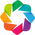

WidgetBox(margin=(5, 10), name='Layout')
    [0] StaticText(value='<b>Layout</b>')
    [1] TextInput(description='String identifier f..., name='Name', value='HoloViews01208')
    [2] LiteralInput(description='Whether the object should..., name='Align', serializer='json', value='start')
    [3] LiteralInput(description='Describes the proportiona..., name='Aspect ratio', serializer='json')
    [4] ListInput(description='CSS classes t..., name='Css classes', serializer='json', type=<class 'list'>)
    [5] IntInput(description='The height of the compone..., name='Height', start=0, value=300)
    [6] IntInput(description='Minimal width o..., name='Min width', start=0)
    [7] IntInput(description='Minimal height o..., name='Min height', start=0)
    [8] IntInput(description='Maximum width o..., name='Max width', start=0)
    [9] IntInput(description='Maximum height o..., name='Max height', start=0)
    [10] LiteralInput(description='Allows to create addition..., name='Margin', serializer='json', value=(5, 10))
    [11] DictInput(description='Dictionary of C..., name='Styles', serializer='json', type=<class 'dict'>)
    [12] ListInput(description='List of arbitrary t..., name='Tags', serializer='json', type=<class 'list'>)
    [13] IntInput(description='The width of the componen..., name='Width', start=0)
    [14] Select(description='Describes how the compone..., name='Width policy', options=OrderedDict([('auto', ...]), value='auto')
    [15] Select(description='Describes how the compone..., name='Height policy', options=OrderedDict([('auto', ...]), value='auto')
    [16] Select(description='How the component should ..., name='Sizing mode', options=OrderedDict([('fixed', ...]))
    [17] Checkbox(name='Visible', value=True)

In [14]:
##ignore
import holoviews as hv
import panel as pn

hv.extension("bokeh", "plotly")

import numpy as np
import pandas as pd
import hvplot.pandas

data = {"group": np.random.randint(0, 10, 100), "value": np.random.randn(100)}
df = pd.DataFrame(data)
plot = df.hvplot.scatter(x="group", y="value", height=300, responsive=True)
pn.pane.HoloViews(plot, height=300).controls()